In [4]:
import requests
import pandas as pd


In [5]:
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/main/TelecomX_Data.json'
response = requests.get(url)

In [6]:
if response.status_code == 200:
    print("Dados carregados com sucesso!")
else:
    print("Erro ao acessar a API:", response.status_code)


Dados carregados com sucesso!


In [7]:
data = response.json()  # Converte a resposta em JSON
# Caso os dados estejam aninhados, considere usar pd.json_normalize
df = pd.DataFrame(data)

# Se você identificar estruturas aninhadas e precisar de uma tabela "achatada":
# df = pd.json_normalize(data)


In [11]:
base_telecomx = df

In [12]:
base_telecomx.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


Verificar a estrutura das colunas

In [17]:
base_telecomx.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges'],
      dtype='object')

✅ Explorar as colunas do dataset e verificar seus tipos de dados.
✅ Consultar o dicionário para entender melhor os significados das variáveis.

In [18]:
base_telecomx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        7267 non-null   object
 1   Churn             7267 non-null   object
 2   gender            7267 non-null   object
 3   SeniorCitizen     7267 non-null   int64 
 4   Partner           7267 non-null   object
 5   Dependents        7267 non-null   object
 6   tenure            7267 non-null   int64 
 7   PhoneService      7267 non-null   object
 8   MultipleLines     7267 non-null   object
 9   InternetService   7267 non-null   object
 10  OnlineSecurity    7267 non-null   object
 11  OnlineBackup      7267 non-null   object
 12  DeviceProtection  7267 non-null   object
 13  TechSupport       7267 non-null   object
 14  StreamingTV       7267 non-null   object
 15  StreamingMovies   7267 non-null   object
 16  Contract          7267 non-null   object
 17  PaperlessBilli

Normalizar colunas aninhadas

In [15]:
base_telecomx = pd.concat([base_telecomx.drop(['customer', 'phone', 'internet', 'account'], axis=1),
                           base_telecomx['customer'].apply(pd.Series),
                           base_telecomx['phone'].apply(pd.Series),
                           base_telecomx['internet'].apply(pd.Series),
                           base_telecomx['account'].apply(pd.Series)], axis=1)


✅ Explorar a distribuição do churn Como o objetivo é entender a evasão de clientes, podemos visualizar a distribuição da variável Churn:

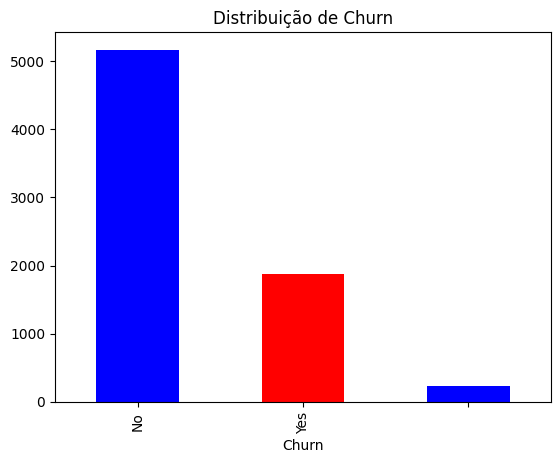

In [19]:
import matplotlib.pyplot as plt
base_telecomx['Churn'].value_counts().plot(kind='bar', color=['blue', 'red'])
plt.title("Distribuição de Churn")
plt.show()


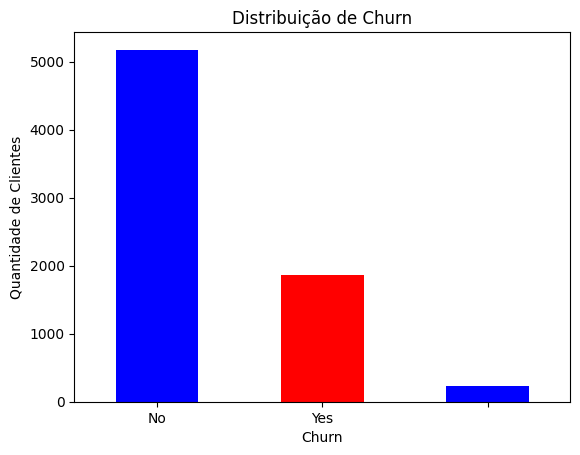

In [22]:
import matplotlib.pyplot as plt
ax = base_telecomx['Churn'].value_counts().plot(kind='bar', color=['blue', 'red'])
plt.title("Distribuição de Churn")
plt.xlabel("Churn")
plt.ylabel("Quantidade de Clientes")
plt.xticks(rotation=0)
plt.show()


✅ Verificar valores ausentes Para garantir que os dados estão completos:

In [20]:
base_telecomx.isnull().sum()


,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


✅ Identificar as colunas mais relevantes para a análise de evasão.

In [27]:
# Selecionando as colunas mais relevantes
colunas_relevantes = [
    'customerID', 'Churn', 'tenure', 'Contract', 'PaymentMethod',
    'Charges', 'InternetService', 'OnlineSecurity', 'TechSupport',
    'StreamingTV', 'StreamingMovies'
]

# Criando um novo DataFrame apenas com essas colunas
base_telecomx_filtrado = base_telecomx[colunas_relevantes]


In [29]:
base_telecomx_filtrado.head()


,customerID,Churn,tenure,Contract,PaymentMethod,Charges,InternetService,OnlineSecurity,TechSupport,StreamingTV,StreamingMovies
0,0002-ORFBO,No,9,One year,Mailed check,"{'Monthly': 65.6, 'Total': '593.3'}",DSL,No,Yes,Yes,No
1,0003-MKNFE,No,9,Month-to-month,Mailed check,"{'Monthly': 59.9, 'Total': '542.4'}",DSL,No,No,No,Yes
2,0004-TLHLJ,Yes,4,Month-to-month,Electronic check,"{'Monthly': 73.9, 'Total': '280.85'}",Fiber optic,No,No,No,No
3,0011-IGKFF,Yes,13,Month-to-month,Electronic check,"{'Monthly': 98.0, 'Total': '1237.85'}",Fiber optic,No,No,Yes,Yes
4,0013-EXCHZ,Yes,3,Month-to-month,Mailed check,"{'Monthly': 83.9, 'Total': '267.4'}",Fiber optic,No,Yes,Yes,No
